![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

### <center>  Grupo 22 </center>

<center>David Alejandro Rojas Castro - da.rojasc123@uniandes.edu.co </center>
<center>Camila Malagón Suarez - c.malagons@uniandes.edu.co</center>
<center>Luis David Gutierrez - ld.gutierrezl1@uniandes.edu.co</center>
<center>David Zapata Vásquez - d.zapata11@uniandes.edu.co</center>

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [10]:
df.shape

(541462, 3)

<Axes: >

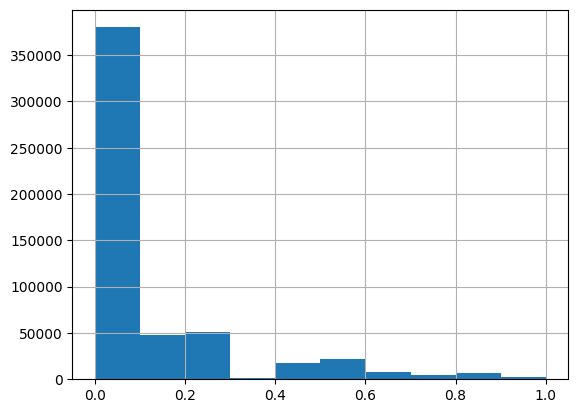

In [11]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [12]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [13]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [14]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 1

## Tokenización de las variables predictoras del set de entrenamiento y testeo
tokenizacion = CountVectorizer(lowercase= False)
vector_Xtrain_tokenizado = tokenizacion.fit_transform(X_train)
vector_Xtest_tokenizado = tokenizacion.transform(X_test)


## Crear modelo de regresión - RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators= 15, max_depth= 10)
random_forest.fit(vector_Xtrain_tokenizado,y_train)
y_pred = random_forest.predict(vector_Xtest_tokenizado)
print('MSE: ',mean_squared_error(y_test, y_pred))

MSE:  0.031405552289863845


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
# Celda 2
## Tokenización de las variables predictoras del set de entrenamiento y testeo
tokenizacion2 = CountVectorizer(lowercase= False, ngram_range=(3,3))
vector_Xtrain_tokenizado2 = tokenizacion2.fit_transform(X_train)
vector_Xtest_tokenizado2 = tokenizacion2.transform(X_test)


## Crear modelo de regresión - RandomForestRegressor
random_forest2 = RandomForestRegressor(n_estimators= 15, max_depth= 10)
random_forest2.fit(vector_Xtrain_tokenizado2,y_train)
y_pred2 = random_forest2.predict(vector_Xtest_tokenizado2)
print('MSE: ',mean_squared_error(y_test, y_pred2))

MSE:  0.038437065443586924


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3

La función TF IDF Vectorizer realiza una tokenización ponderando los términos de acuerdo a su frecuencia de aparición en cada documento y en otros documentos. Los términos que tiene una frecuencia de aparición alta en un documento de interés y en otros documentos reciben una ponderación menor, dado que la función identifica que son palabras que suelen ser utilizadas frecuentemente en los textos sin brindar información clave sobre el mismo. Mientras que los términos que son utilizados en menos documentos tendrán una ponderación mayor, ya que permitirán clasificar y diferenciar a un texto de otros. La función TfidfVectorizer internamente hace la ponderación interdocumento y entre documentos de los tokens, eliminando palabras como articulos y stopwords que no ofrecen información relevante para la predección, siendo esta su principal ventaja frente al uso de la función CountVectorizer la cual pondera las palabras únicamente en función de su frecuencia de aparición. Si bien, la función CountVectorize puede filtrar las palabras que no ofrecen información relevante, lo realiza mediante el uso de múltiples parametros como stopwords y de otras técnicas más complejas que el uso de la función TfidfVectorizer.  


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
# Celda 4

## Tokenización de las variables predictoras del set de entrenamiento y testeo usando TfidfVectorizer
tokenizacion_tfidf = TfidfVectorizer(lowercase= False)
vector_Xtrain_tokenizado_tfidf = tokenizacion_tfidf.fit_transform(X_train)
vector_Xtest_tokenizado_tfidf = tokenizacion_tfidf.transform(X_test)


## Crear modelo de regresión - RandomForestRegressor
random_forest3 = RandomForestRegressor(n_estimators= 15, max_depth= 10)
random_forest3.fit(vector_Xtrain_tokenizado_tfidf,y_train)
y_pred3 = random_forest3.predict(vector_Xtest_tokenizado_tfidf)

print('MSE: ',mean_squared_error(y_test, y_pred3))

MSE:  0.03134025642453577


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

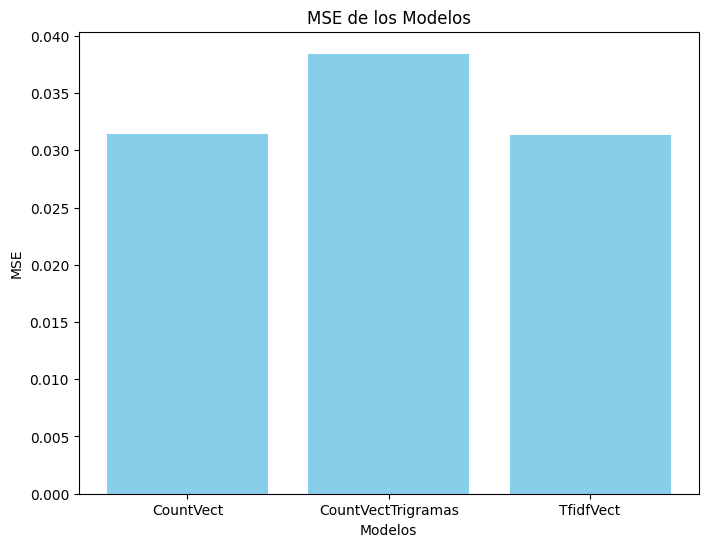

In [26]:
# Celda 5
MSE_Count_vect = mean_squared_error(y_test, y_pred)
MSE_Count_vect_trigramas = mean_squared_error(y_test, y_pred2)
MSE_TFIDF = mean_squared_error(y_test, y_pred3)

modelos = ['CountVect','CountVectTrigramas','TfidfVect']
valores = [MSE_Count_vect,MSE_Count_vect_trigramas,MSE_TFIDF]

plt.figure(figsize=(8, 6))
plt.bar(modelos, valores, color='skyblue')

# Títulos y etiquetas
plt.title('MSE de los Modelos')
plt.xlabel('Modelos')
plt.ylabel('MSE')

# Mostrar la gráfica
plt.show()

**Análisis de resultados**

Posterior al entrenamiento y generación de predicciones de los modelos RandomForestRegressor con 15 árboles y profundidad de 10 para cada uno se encontraron los siguientes MSE:

- Modelo 1 - Usando CountVectorizer por defecto: MSE 0.0314
- Modelo 2 - Usando CountVectorizer tokenizando usando Trigramas por defecto: MSE 0.0384
- Modelo 3 - Usando TF-IDF Vectorizer por defecto: MSE 0.0313

Con una diferencia de 0.0001 en el MSE, el modelo con menor error fue el #3, diferencia muy baja pero que puede ser explicada en la diferencia en la ponderación de cada token a la hora crear las matrices de pesos. En el caso de TF-IDF, se tiene en cuenta la importancia relativa de cada token dentro del corpus (texto completo), mientras que CountVectorizer solo tiene en cuenta la frecuencia de aparición de cada token en un mismo documento (oración o división del texto).

Por otro lado, dada la naturaleza del dataset usado, resulta inconveniente aplicar la tokenización usando trigramas dado que el MSE aumenta ligeramente y el tiempo tomado para el entrenamiento y predicción aumenta considerablemente. A continuación, se muestran los tiempos tomados para tokenizar, entrenar y encontrar predicciones para cada modelo (tiempos de referencia dada la ejecución en un equipo específico).

- Modelo 1 - 3 minutos 29 segundos
- Modelo 2 - 29 minutos 52 segundos
- Modelo 3 - 9 minutos 52 segundos

Teniendo en cuenta los resultados anteriores, se puede concluir que el mejor modelo es el #1 usando Tokenización con unigramas y CountVectorizer dado que la diferencia en el MSE versus el modelo usando TFIDF es mínima pero el tiempo de ejecución si representa un cambio a tener en cuenta.

